# TKT4108 Structural dynamics 2

## Solution exercise 4

**Main topics:** Monte Carlo simulation of time series, auto and cross-correlation, auto and cross-spectral density

**References:** Newland Chapter 4-5




### Problem 1: Simulation of time series using auto correlation function


We have the auto correlation function:

$$ R_x(\tau)= \sigma_x^2 \exp( - \dfrac{\tau^2}{2 L^2}) \cos(\omega \tau )$$.

The time vector is $\mathbf{t} = [0,t_1,t_2,\dots,t_N] $, where $t_k = k \cdot \Delta t$.

To simulate a time series, we follow the method from Example 2.1 a random data series is drawn from the following covariance matrix:

$$\mathbf{\Sigma} _{\mathbf{X}_1}^2 = \left[ {\begin{array}{cc}
{{R_{{x}}}(0)}&{{R_{{x}}}({t_1} - {t_2})}& \cdots &{{R_{{x}}}({t_1} - {t_N})}\\
{{R_{{x}}}({t_2} - {t_1})}&{{R_{{x}}}(0)}& \cdots &{{R_{{x}}}({t_2} - {t_N})}\\
 \vdots & \vdots & \ddots & \vdots \\
{{R_{{x}}}({t_N} - {t_1})}&{{R_{{x}}}({t_N} - {t_2})}& \cdots &{{R_{{x}}}(0)}
\end{array}} \right]$$

The time vector is $60/0.05=1200$ elements long, so this covariance matrix will be $1200\times 1200$. This is close to the limit of what is practical since drawing numbers from very large matrices takes a long time.


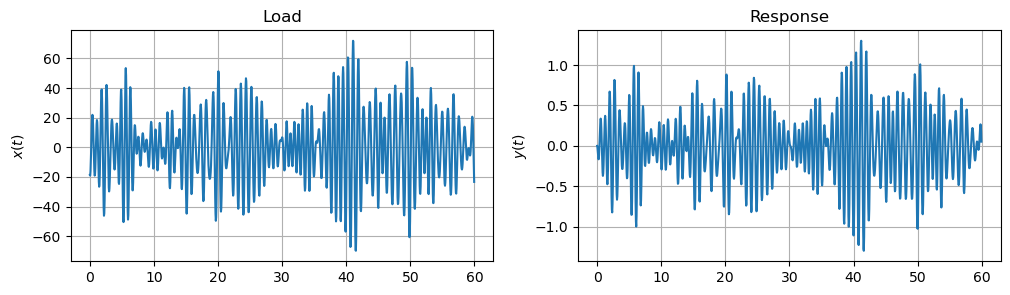

In [46]:
import numpy as np
from matplotlib import pyplot as plt
import time

import sys
sys.path.append('./../../modules')
from time_integration import * # Import all functions in the module time_integration

# Parameters of the auto covariance
sigma=20.0
L=1.0
omega=8


dt=0.05 # Time step
t=np.arange(0,60,dt) # Time vector

tau_mat = np.abs(np.array([t])-np.array([t]).T) # Matrix of all possible time lags
mean = np.zeros((t.shape[0])) # Vector of mean values 
cov = sigma**2*np.exp(-0.5*tau_mat**2/L**2)*np.cos(omega*tau_mat) # Co-variance matrix defined using the auto correlation function

x = np.random.multivariate_normal(mean,cov,1) # Simulate the points

# System parameters
m=1.0
c=5.0
k=100.0

u0 = np.array([0.0]) #Initial displacement
udot0 = np.array([0.0]) # Initial velocity

# Solve by Newmark
y, ydot, y2dot = linear_newmark_krenk(m,c,k,x,u0,udot0,dt)

# Plot load and response
fig, axs = plt.subplots(1,2,figsize=(12,3))
axs[0].plot(t, x[0,:])
axs[0].set_ylabel('$x(t)$')
axs[0].set_title('Load')
axs[0].grid(True)

axs[1].plot(t, y[0,:])
axs[1].set_ylabel('$y(t)$')
axs[1].set_title('Response')
axs[1].grid(True)



**c**)

The calculation procedure is repeated using for loop where $\mathbf{\omega}=[1,2,3,\cdots,15]$. 

Text(0.5, 0, '$\\omega$')

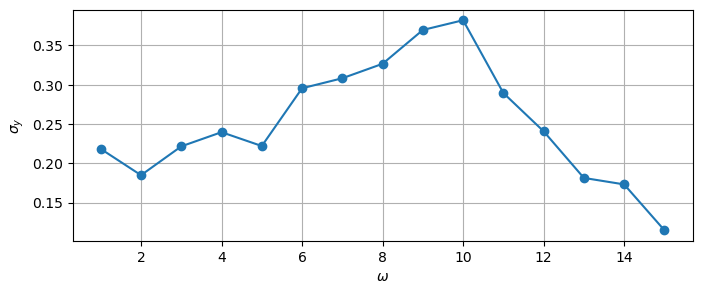

In [47]:

omega_test=np.arange(1.0,15.0+1.0,1.0) # Vector with all omega to test

sd_y=np.zeros_like(omega_test)
for idx in np.arange(len(omega_test)):
    
    cov = sigma**2*np.exp(-0.5*tau_mat**2/L**2)*np.cos(omega_test[idx]*tau_mat) # Co-variance matrix defined using the auto correlation function
    
    x = np.random.multivariate_normal(mean,cov,1) # Simulate the points
    
    y, ydot, y2dot = linear_newmark_krenk(m,c,k,x,u0,udot0,dt)
    
    sd_y[idx]=np.std(y)  # Calculate standard deviation of the response

plt.figure(figsize=(8,3))
plt.plot(omega_test,sd_y,'-',marker='o')
plt.grid()
plt.ylabel(r'$\sigma_y$')
plt.xlabel(r'$\omega$')


We see a clear trend: for small $\omega$, the response is rather small. The greatest response is obtained around $\omega=10$ rad/s, which coincides with the natural frequency: $\omega_n=\sqrt{k/m}=\sqrt{100}=10$ rad/s. For higher $\omega$ much higher than the natural frequency, the system is mainly in the mass-controlled regime where the response also is lower.

When we generate the time series using  $R(\tau)$ for different $\omega$, distinct changes in the frequency characteristics of $x(t)$ become evident. This indicates that the auto correlation function $R(\tau)$, despite being a time-domain function, inherently reflects information about the frequency content as well. This will be studied more in detail in later topics (spectral density).

There is also a small variability in the results for the standard deviation (the curves changes a bit for every run). This is because the 60 s long time series is not long enough to determine the statistical moments very accurately, so there will be some uncertainty in the results. 


### Problem 2: Fourier series

**a)**

We start by plotting the function $f(t)=1-|t|$.


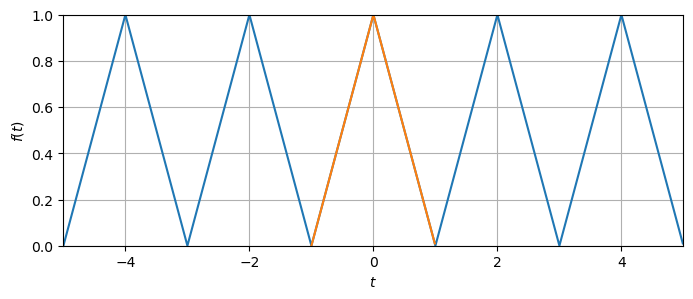

In [48]:
import numpy as np
from matplotlib import pyplot as plt

T=2 # Length of period
t = np.arange(-1,1,0.01) # x-axis
f = 1-np.abs(t) # Function value

# Plot waveform
plt.figure(figsize=(8, 3))
plt.plot(np.hstack((t-2*T,t-T, t, t+T,t+2*T)),np.hstack((f,f,f,f,f))) # Plot five periods
plt.plot(t,f) # Plot one period
plt.ylim(0,1)
plt.xlim(-5,5)
plt.xlabel('$t$')
plt.ylabel('$f(t)$')
plt.grid()



The Fourier series is defined as:

$$ x(t) = a_{0} + \sum_{k=1}^{\infty} \left( a_k \cos\left(\frac{2\pi k}{T}t \right) + b_k \sin\left(\frac{2\pi k}{T}t \right)\right)  $$

Here $a_0$, $a_k$, and $b_k$ are Fourier coefficients given by:

$$a_0 = \frac{1}{T} \int_{0}^{T}x(t) \:\text{d}t$$

$$a_k = \frac{1}{T} \int_{0}^{T}x(t)\cos\left(\frac{2\pi k}{T}t \right)\:\text{d}t$$

$$b_k = \frac{1}{T} \int_{0}^{T}x(t)\sin\left(\frac{2\pi k}{T}t \right)\:\text{d}t$$

We calculate the coefficients by numerical integration for up to 32 terms:

a0 is 0.49997499999999995


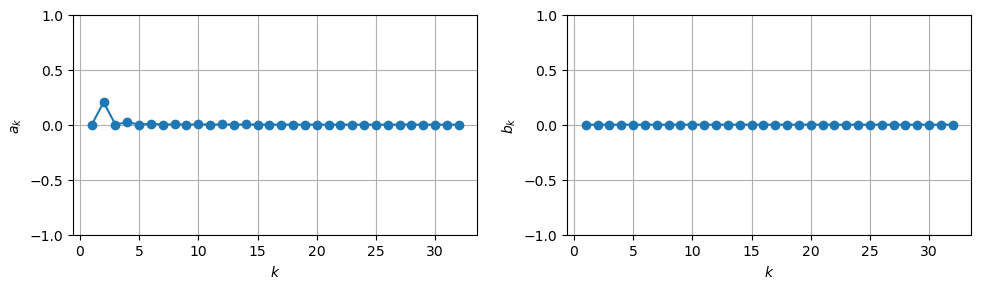

In [49]:
nterms = 32 # Number of Fourier coefficients in the sum

a0 = 1/T*np.trapz(f,t) # Mean value
ak = np.zeros((nterms)) 
bk = np.zeros((nterms))
for k in np.arange(1,nterms,1): # Integrate for all terms
    ak[k] = 1/T*np.trapz(f*np.cos(2.0*np.pi*k*t/T),t)
    bk[k] = 1/T*np.trapz(f*np.sin(2.0*np.pi*k*t/T),t)

# Plot Fourier coeffecients
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.plot(np.arange(1,nterms+1),ak,marker='o')
plt.ylim(-1, 1)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$a_k$')

plt.subplot(1, 2, 2)
plt.plot(np.arange(1,nterms+1),bk,marker='o')
plt.ylim(-1, 1)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$b_k$')

plt.tight_layout()

print('a0 is ' + str(a0))

As expected, $a_0=0.5$, which is the mean value of $f(t)$.

All sine terms ($b_k$) will be zero since the function $f(x)$ is an even function.

Even for the cosine terms ($a_k$), the first few coefficients contribute the most; higher terms are very small. This indicates we only need a few terms to approximate well the function with a Fourier series. We can confirm with a plot.


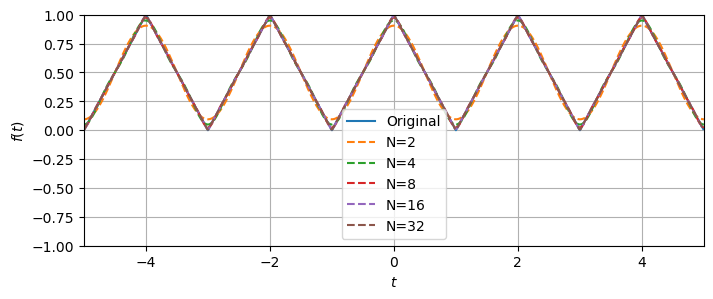

In [50]:
# Plot Fourier series approximation

tp  = np.linspace(-5,5,1000) # x-axis

f_Fourier = np.zeros((nterms,tp.shape[0]))

# Save each term up to 32
for k in np.arange(1,nterms,1):
    f_Fourier[k-1,:] = 2.0*(ak[k]*np.cos(2.0*np.pi*k*xp/T) + bk[k]*np.sin(2.0*np.pi*k*xp/T))

plt.figure(figsize=(8, 3))
plt.plot(np.hstack((t-2*T,t-T, t, t+T,t+2*T)),np.hstack((f,f,f,f,f)), label='Original') # Plot five periods

N_plot=[2,4,8,16,32]

for N in N_plot:

    f_Fourier_plot=np.ones(tp.shape[0])*a0+np.sum(f_Fourier[0:N,:],axis=0)
    plt.plot(tp,f_Fourier_plot,'--',label=('N='+str(N)))

plt.ylim(-1, 1)
plt.xlim(-5,5)
plt.grid()
plt.xlabel('$t$')
plt.ylabel('$f(t)$')
plt.legend()

We confirm that even using $N=2$ or $N=4$ terms is a good approximation, but higher orders yields slight more accuracy.

### Problem 3: Technical terms

**a)**

- *Two-sided auto spectral density*: describes the energy (variance) distribution across both positive and negative frequencies $(-\infty < \omega < \infty $). It is symmetric around zero: $S_{x}(\omega) = S_{x}(-\omega)$.

- *One-sided auto spectral density*: since the spectrum is symmetric, we can shift all energy to positive frequencies. We then have to double it:
$   S_{x}^{+}(\omega) = 2 S_{x}(\omega) \quad (0 < \omega < \infty )$


**b)**

- *Auto spectral density*: symmetric, real, and non-negative since it represents the energy at each frequency.

- *Cross-spectral density*: can be complex. Can be positive and negative. The real part is symmetric and the imaginary part is antisymmetric. This can expressed as: $ S_{x_1 x_2}(\omega) = \overline{S_{x_1 x_2}}(-\omega)  $.


**c)**

Why must the imaginary part be anti-symmetric? Firstly, the covariance can be calculated from the area of the cross-spectrum:

$$ \text{Cov}(x_1,x_2) = 
\int_{-\infty}^{\infty} 
S_{x_1 x_2}(\omega) \: \text{d} \omega
$$

The covariance is always a real number, so the imaginary part must cancel out in the integration over negative and positive frequencies. The anti-symmetric property of the imaginary part ensures this cancellation will take place.

We can also consider more in a more in-depth view of the cross-correlation:

$$
R_{x_1 x_2}(\tau)=
\int_{-\infty}^{\infty}
S_{x_1 x_2}(\omega) \exp({i \omega \tau}) \: \text{d} \omega
=
\int_{-\infty}^{\infty}
S_{x_1 x_2}(\omega) \big( \cos(\omega\tau)+i \sin(\omega\tau) \big) \: \text{d} \omega
$$

We can split this integral into four different contributing terms:

- $\Re( S_{x_1 x_2}(\omega)) \cos(\omega\tau) = \text{Even} \times \text{Even} = \text{Even} = \text{Non-zero integral} $
- $\Re( S_{x_1 x_2}(\omega)) \: i \: \sin(\omega\tau) = i \times \text{Even} \times \text{Odd} = i \times \text{Odd} = i \times \text{Zero integral} $
- $i \: \Im( S_{x_1 x_2}(\omega)) \cos(\omega\tau) = i \times \text{Odd} \times \text{Even} = i \times \text{Odd} = i \times \text{Zero integral} $
- $i \: \Im( S_{x_1 x_2}(\omega)) \: i\:  \sin(\omega\tau) = i^2 \times \text{Odd} \times \text{Odd} = - \text{Even} = \text{Non-zero integral} $

The real part of $S$ is symmetric (even), the imaginary part is anti-symmetric (odd). Cosine is an even function, while sine is odd. 

The integral of an even function (from $-\infty$ to $\infty$) will be a non-zero number, while for an odd function it will always be zero.

We see that all imaginary components of the integral will be zero. This is naturally required since $R_{x_1 x_2}(\tau)$ is purely real.


### Problem 4: Relation between auto correlation and spectral density

**a)**

We have $ R(\tau)= \sigma^2 \exp( - \dfrac{\tau^2}{2 L^2}) $. The spectral density is the Fourier transform:

$$
S(\omega)=
\dfrac{1}{2 \pi}
\int_{-\infty}^{\infty}
R(\tau) \exp({-i \omega \tau}) \: \text{d} \tau
$$

This integral has an analytical solution. We can look up the Fourier transform of $e^{-x^2}$ in tables, or ask a machine learning language model for the answer to the integral:

$$
S(\omega)=
\frac{\sigma^2}{\sqrt{2\pi} } L \exp\left( -\frac{1}{2} \omega^2 L^2 \right)
$$


**b)**

We have $S(\omega)= \dfrac{\sigma^2 \cdot 2a}{2\pi} \cdot \dfrac{1}{a^2+\omega^2}  $. The auto-correlation density is the inverse Fourier transform:

$$
R(\tau)=
\int_{-\infty}^{\infty}
S(\omega) \exp({i \omega \tau}) \: \text{d} \omega
$$

This integral has an analytical solution. We can look up the inverse Fourier transform of $\dfrac{1}{a^2+x^2}$ in tables, or ask a machine learning language model for the answer to the integral:

$$
R(\tau)=
\sigma^2 \exp \left( -a | \tau | \right)
$$


**c)**


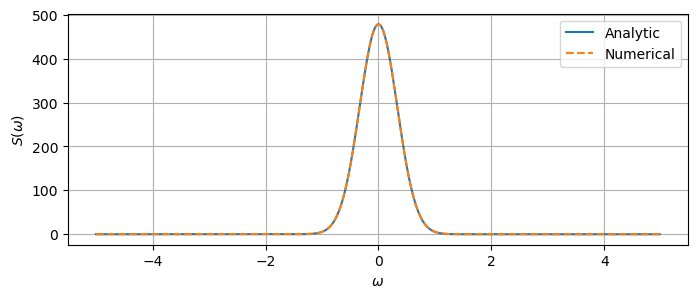

In [51]:
# Parameters
sigma=20
L=3

tau = np.arange(-15,15,0.01) # Time vector
R = sigma**2*np.exp(-0.5*tau**2/L**2) # Auto correlation

omega = np.arange(-5,5,0.02) # Frequency vector
S=sigma**2/np.sqrt(2*np.pi)*L*np.exp(-0.5*omega**2*L**2) # Analytical spectrum

# Integrate over tau for each omega
S_num = np.zeros(omega.shape[0],dtype=complex) 
for k in range(omega.shape[0]):
    S_num[k] = 1/2/np.pi*np.trapz(R*np.exp(-1j*omega[k]*tau),tau) # Spectrum by numerical integration

S_num=np.real(S_num) # Remove false imaginary components

# Compare in a plot
plt.figure(figsize=(8, 3))
plt.plot(omega,np.real(S),label='Analytic')
plt.plot(omega,np.real(S_num),'--',label='Numerical')
plt.grid()
plt.ylabel(r'$S(\omega)$')
plt.xlabel(r'$\omega$')
plt.legend()

We can calculate the variance using two methods: $\sigma^2=R(\tau=0)$ and  $\sigma^2=\int_{-\infty}^{\infty} S(\omega)  \: \text{d} \omega $. If calculations are correct, these should be equal.


In [52]:
sd_num=np.trapz(S_num,omega)**0.5

print('SD from ACF is ' + str(sigma))
print('SD from PSD is ' + str(sd_num))


SD from ACF is 20
SD from PSD is 19.999999817795317



**d)**

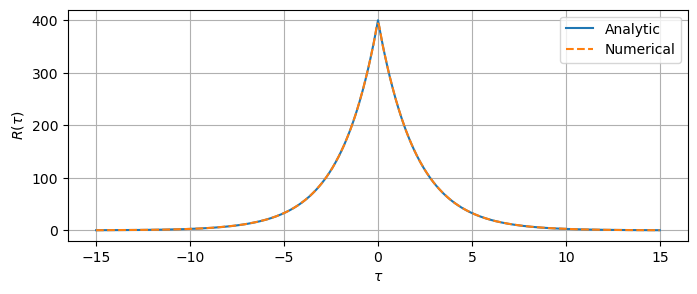

In [53]:
# Parameters
sigma=20
a=0.5

tau = np.arange(-15,15,0.01) # Time vector

omega = np.arange(-20,20,0.01) # Frequency vector
S = sigma**2*2*a/(2*np.pi)*1/(a**2+omega**2) # Spectral density

R=sigma**2*np.exp(-a*np.abs(tau)) # Analytical auto correlation

# Integrate over omega for each tau
R_num = np.zeros(tau.shape[0],dtype=complex)
for k in range(tau.shape[0]):
    R_num[k] = np.trapz(S*np.exp(1j*omega*tau[k]),omega) # Auto correlation by numerical integration

R_num=np.real(R_num) # Remove false imaginary components

# Compare in a plot
plt.figure(figsize=(8, 3))
plt.plot(tau,np.real(R),label='Analytic')
plt.plot(tau,np.real(R_num),'--',label='Numerical')
plt.grid()
plt.ylabel(r'$R(\tau)$')
plt.xlabel(r'$\tau$')
plt.legend()

We compare the standard deviation in a similar manner.

In [54]:
sd_num=np.trapz(S,omega)**0.5

print('SD from ACF is ' + str(np.max(R)**0.5))
print('SD from PSD is ' + str(sd_num))

SD from ACF is 19.9999999999984
SD from PSD is 19.84020001045208
